# Linear regression

In [1]:
import torch
import matplotlib.pyplot as plt

## Data

Ground truth $y = 2x + 1$

Batch size: $N$

Input: $x = \begin{bmatrix}x_1 ... & x_N\end{bmatrix}$

Output $y = \begin{bmatrix}y_1 & ... & y_N\end{bmatrix}$ 
where $y_i = 2x_i + 1 + \epsilon$, 
$\epsilon$ is noise.



In [2]:
true_b = 1
true_w = 2
N = 100

# Data Generation
torch.manual_seed(42)
x = torch.rand(N)
epsilon = (0.1 * torch.randn(N))
y = true_b + true_w * x + epsilon

# Plot

Learning red curve from blue data.

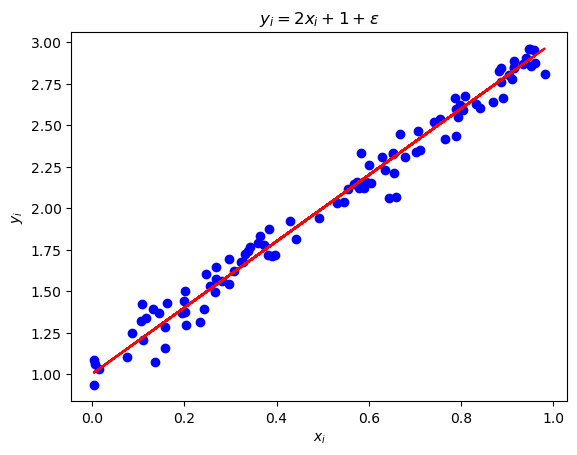

In [3]:
plt.xlabel("$x_i$")
plt.ylabel("$y_i$")
plt.title("$y_i = 2x_i + 1 + \epsilon$")
plt.plot(x, true_b + true_w * x, c="red")
plt.scatter(x, y, c = "blue")

# PyTorch framework model and train

Model is perceptron without activation. 

$\hat{y} = W x + b$ for batch or 
$\hat{y_i}=W x_i + b$ for datapoint.

Loss: $L(y,\hat{y})=\frac{1}{N}\sum_{i=1}^N (y_i - \hat{y_i})^2$

Gradient: 

$\frac {\partial L(y,\hat{y})} {\partial W} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - \hat{y_i}) x_i$

$\frac {\partial L(y,\hat{y})} {\partial b} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})$

In [4]:
model = torch.nn.Sequential(torch.nn.Linear(1, 1))
lr = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = torch.nn.MSELoss(reduction='mean')

x_train = x.view(N, 1)
y_train = y.view(N, 1)

n_epochs = 500
fw_losses = []

# remember initial model parameters
w, b = model.parameters()
fw_params = [(w.data.detach().clone(), b.data.detach().clone())]
fw_grads = []

for epoch in range(n_epochs):
    # Sets model to TRAIN mode
    model.train()

    # Step 1 - Computes model's predicted output - forward pass
    y_hat = model(x_train)

    # Step 2 - Computes the loss
    loss = loss_fn(y_hat, y_train)
    fw_losses.append(loss.item())

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()    

    # Step 4 - Updates parameters using gradients and the learning rate
    optimizer.step()
    
    # Remember params and grads
    w, b = model.parameters()
    fw_params.append((w.data.detach().clone(), b.data.detach().clone()))
    fw_grads.append((w.grad.detach().clone(), b.grad.detach().clone()))
    
    # Annulate gradients
    optimizer.zero_grad()

fw_params = torch.tensor(fw_params)
fw_grads = torch.tensor(fw_grads)

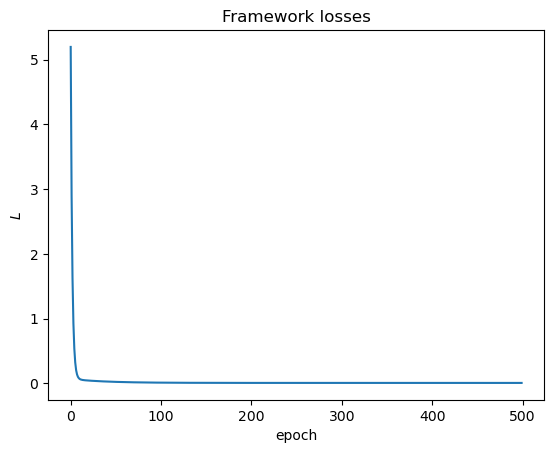

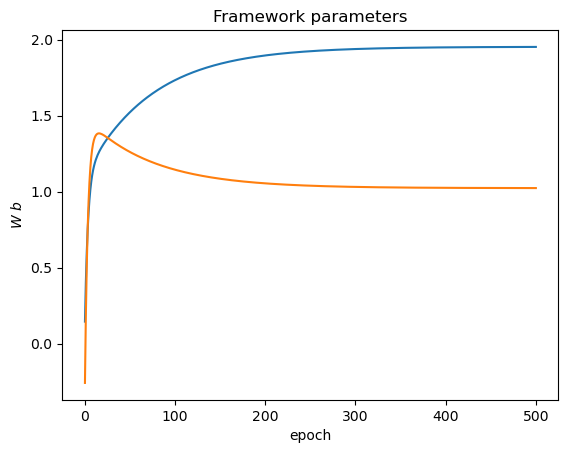

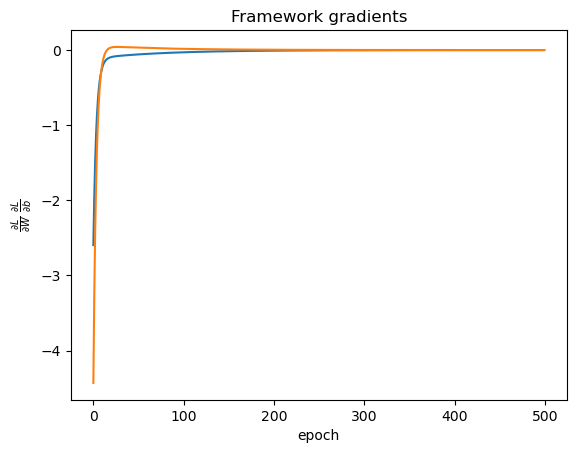

In [5]:
plt.title("Framework losses")
plt.xlabel("epoch")
plt.ylabel(r"$L$")
plt.plot(fw_losses)
plt.show()

plt.title("Framework parameters")
plt.xlabel("epoch")
plt.ylabel(r"$W$ $b$")
plt.plot(fw_params)
plt.show()

plt.title("Framework gradients")
plt.xlabel("epoch")
plt.ylabel(r"$\frac {\partial L}{\partial W}$ $\frac {\partial L}{\partial b}$")
plt.plot(fw_grads)
plt.show()


# Manual model and train

In [6]:
#initial model parameters
w, b = fw_params[0]

man_losses = []
man_params = [(w, b)]
man_grads = []

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    y_hat = w * x_train + b

    # Step 2 - Computes the loss
    loss = 1 / N * torch.sum((y_hat - y_train) ** 2)
    man_losses.append(float(loss))

    # Step 3 - Computes gradients for both "b" and "w" parameters
    wgrad = 2 / N * torch.sum((y_hat - y_train) * x_train)
    bgrad = 2 / N * torch.sum((y_hat - y_train))
    
    # Step 4 - Updates parameters using gradients and the learning rate
    w = w - lr * wgrad
    b = b - lr * bgrad

    # Remember params and grads
    man_grads.append((wgrad, bgrad))
    man_params.append((w, b))

man_params = torch.tensor(man_params)
man_grads = torch.tensor(man_grads)

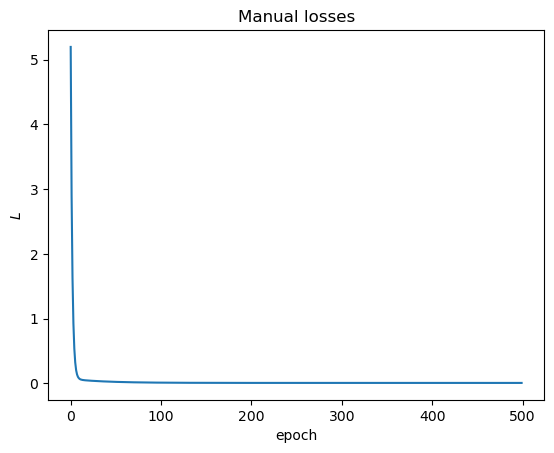

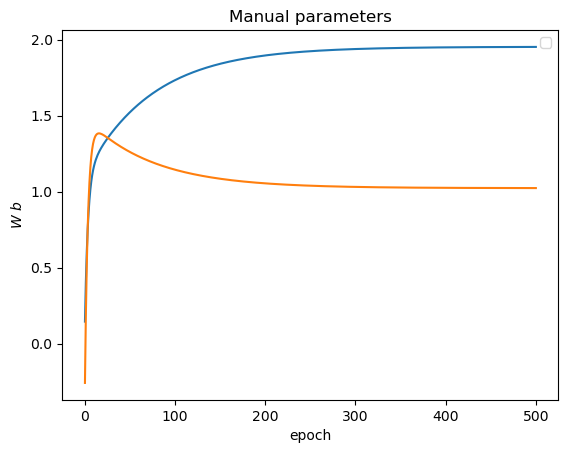

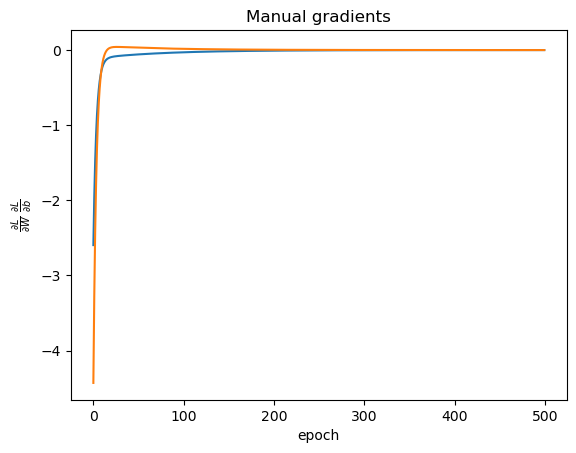

In [7]:
plt.title("Manual losses")
plt.xlabel("epoch")
plt.ylabel(r"$L$")
plt.plot(man_losses)
plt.show()

plt.title("Manual parameters")
plt.xlabel("epoch")
plt.ylabel(r"$W$ $b$")
plt.legend(["1", "2"])
plt.plot(man_params)
plt.show()

plt.title("Manual gradients")
plt.xlabel("epoch")
plt.ylabel(r"$\frac {\partial L}{\partial W}$ $\frac {\partial L}{\partial b}$")
plt.plot(man_grads)
plt.show()

# Comparing manual and framework outputs

In [8]:
for man_p, fw_p in zip(man_params, fw_params):
    print(man_p, fw_p, torch.allclose(man_p, fw_p))

tensor([ 0.1447, -0.2590]) tensor([ 0.1447, -0.2590]) True
tensor([0.4043, 0.1841]) tensor([0.4043, 0.1841]) True
tensor([0.5999, 0.5117]) tensor([0.5999, 0.5117]) True
tensor([0.7480, 0.7537]) tensor([0.7480, 0.7537]) True
tensor([0.8607, 0.9320]) tensor([0.8607, 0.9320]) True
tensor([0.9470, 1.0630]) tensor([0.9470, 1.0630]) True
tensor([1.0138, 1.1589]) tensor([1.0138, 1.1589]) True
tensor([1.0659, 1.2287]) tensor([1.0659, 1.2287]) True
tensor([1.1072, 1.2792]) tensor([1.1072, 1.2792]) True
tensor([1.1404, 1.3153]) tensor([1.1404, 1.3153]) True
tensor([1.1675, 1.3408]) tensor([1.1675, 1.3408]) True
tensor([1.1901, 1.3583]) tensor([1.1901, 1.3583]) True
tensor([1.2093, 1.3701]) tensor([1.2093, 1.3701]) True
tensor([1.2259, 1.3775]) tensor([1.2259, 1.3775]) True
tensor([1.2406, 1.3817]) tensor([1.2406, 1.3817]) True
tensor([1.2538, 1.3836]) tensor([1.2538, 1.3836]) True
tensor([1.2659, 1.3837]) tensor([1.2659, 1.3837]) True
tensor([1.2771, 1.3825]) tensor([1.2771, 1.3825]) True
tensor

In [9]:
print("True parameters:", true_w, true_b)
print("Framework parameters", fw_params[-1])
print("Manual parameters", man_params[-1])

True parameters: 2 1
Framework parameters tensor([1.9528, 1.0236])
Manual parameters tensor([1.9528, 1.0236])
